### RED VS White


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#file to load
wine_data = "Resources/wine_data.csv"
wine_df = pd.read_csv(wine_data)
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
2,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
3,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
4,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


## Average Price of a Bottle of Wine in our Dataset

In [2]:
mean_price = wine_df["price"].mean()
print(f"The average price of a bottle of wine in our Dataset is ${round(mean_price, 2)}")

The average price of a bottle of wine in our Dataset is $35.36


## Point Value vs Price

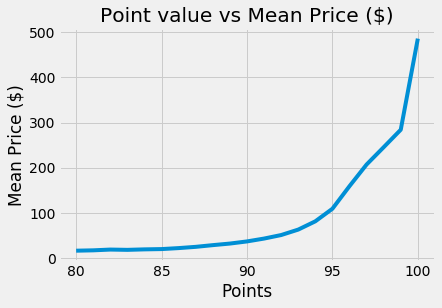

In [84]:
plt.style.use('fivethirtyeight')
mean_prices = wine_df.groupby(['points']).price.mean().plot(kind="line")
plt.xlabel("Points")
plt.ylabel("Mean Price ($)")
plt.title("Point value vs Mean Price ($)")
plt.savefig("Output/Point value vs Mean Price.png")

As expected, as the point value goes up, the price of the wine increases. 

## Average Point Value

In [5]:
avg_point_value = wine_df["points"].mean()
print(f"The average point value of a bottle of wine in our dataset is {round(avg_point_value, 2)} points. So what does that mean? ")


The average point value of a bottle of wine in our dataset is 88.42 points. So what does that mean? 


#### Wine Points
* The magazine that published this dataset uses a 100 point system for classifying wines in a review. 

60-69. Wines are flawed and not recommended

70-79 Wines are flawed and taste average

80-84 wines are above average to good

85-90 wines are good to very good

90-94 wines are superior to exceptional

95-100. Wines are benchmark examples or classic



In [6]:
wine_df["points"].min()

80

#### There are no wines in our dataset that are below an 80 on the point scale

In [83]:
#Analyzing wine score
point_df = wine_df[["Unnamed: 0", "points"]]
rating = []
for row in point_df["points"]:
    if row >=95:
        rating.append("Classic")
    elif row > 90 : 
        rating.append("Exceptional")
    elif row >= 85 :
        rating.append("Very Good")
    elif row >= 80 :
        rating.append("Good")
    else:
        rating.append("Flawed wine, don't waste your time")
    
    

point_df["rating"] = rating

point_df.head()


C:\Users\Erin.Ford\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Unnamed: 0,points,rating
0,1,87,Very Good
1,2,87,Very Good
2,3,87,Very Good
3,4,87,Very Good
4,5,87,Very Good


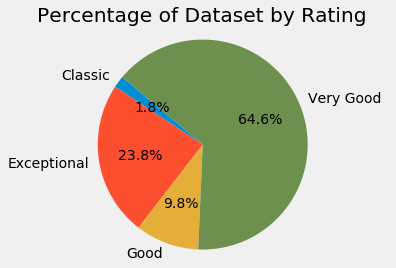

In [85]:
#Plotting ratings on a pie chart
plt.style.use('fivethirtyeight')
rating_pie=point_df.groupby(["rating"]).points.count()
labels=("Classic", "Exceptional", "Good", "Very Good")

plt.pie(rating_pie, labels=labels, autopct ="%1.1f%%", startangle=140)
plt.axis("equal")
plt.title("Percentage of Dataset by Rating")
#Save it
plt.savefig("Output/Percentage of Dataset by Rating")


The variety of wines in our dataset are rated "Very Good".

## Price vs Rating

In [60]:
#adding my previous "rating" column to our main df
wine_df["rating"]= rating
#making df smaller, more manageable
price_wine_df=wine_df[["Unnamed: 0", "price","points", "rating"]]
#Getting my numbers
mean_price_by_rating=round(price_wine_df.groupby(["rating"]).price.mean(),2)
min_price_by_rating =round(price_wine_df.groupby(["rating"]).price.min(),2)
max_price_by_rating = round(price_wine_df.groupby(["rating"]).price.max(), 2)

price_vs_rating_numbers =pd.DataFrame ({"Average Price" : mean_price_by_rating,
                                       "Cheapest bottle" : min_price_by_rating,
                                       "Most expensive bottle" : max_price_by_rating
                                       })
price_vs_rating_numbers["Average Price"] =price_vs_rating_numbers["Average Price"].map("${:.2f}".format)
price_vs_rating_numbers["Cheapest bottle"] =price_vs_rating_numbers["Cheapest bottle"].map("${:.2f}".format)
price_vs_rating_numbers["Most expensive bottle"] =price_vs_rating_numbers["Most expensive bottle"].map("${:.2f}".format)
price_vs_rating_numbers.sort_values("Average Price", ascending=False)

,Average Price,Cheapest bottle,Most expensive bottle
rating,,,
Exceptional,$54.30,$7.00,$2013.00
Very Good,$27.96,$4.00,$3300.00
Good,$18.76,$4.00,$225.00
Classic,$139.02,$20.00,$2500.00


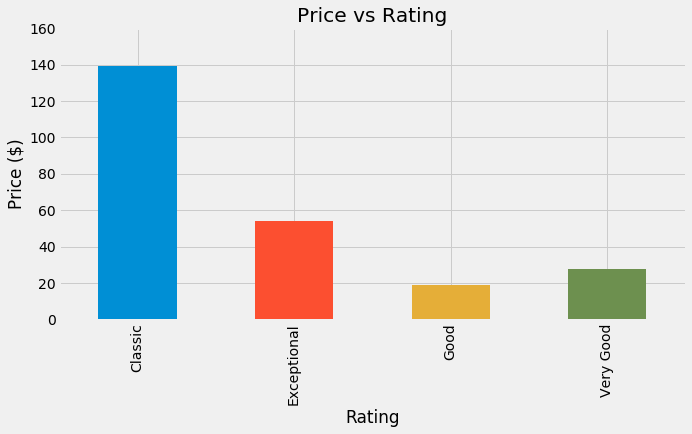

In [86]:
price_wine_df.groupby(["rating"]).price.mean().plot(kind="bar", use_index=True, figsize=(10,5))
plt.xlabel("Rating")
plt.ylabel("Price ($)")
plt.title("Price vs Rating")
plt.ylim(top=160)
#save it
plt.savefig("Output/Price vs Rating.png")


## Variety of wines 

So what is the most popular variety of wine in our dataset? And how do the varieties compare ratings-wise?

In [11]:
count_wine =wine_df["variety"].nunique()
print(f"There are {count_wine} varieties of wine represented in our Dataset.")

There are 697 varieties of wine represented in our Dataset.


## Top 10 varieties of wine represented

In [35]:
minimized_variety_df = wine_df[["Unnamed: 0", "price", "points", "variety"]]
variety_groups = minimized_variety_df.groupby(["variety"]).points.count()
avg_price_variety = round(minimized_variety_df.groupby(["variety"]).price.mean(),2)
min_price_variety = round(minimized_variety_df.groupby(["variety"]).price.min(),3)
max_price_variety = round(minimized_variety_df.groupby(["variety"]).price.max(),3)

variety_costs = pd.DataFrame({"Number of Wines in Dataframe" : variety_groups,
                             "Average Price" : avg_price_variety,
                             "Cheapest Bottle" : min_price_variety,
                             "Most Expensive Bottle": max_price_variety})
final_variety_df =variety_costs.sort_values("Number of Wines in Dataframe", ascending=False).head(10)
final_variety_df

,Number of Wines in Dataframe,Average Price,Cheapest Bottle,Most Expensive Bottle
variety,,,,
Pinot Noir,12787,47.53,5.0,2500.0
Chardonnay,11080,34.52,4.0,2013.0
Cabernet Sauvignon,9386,47.94,4.0,625.0
Red Blend,8476,35.88,5.0,500.0
Bordeaux-style Red Blend,5340,47.21,7.0,3300.0
Riesling,4972,32.00,5.0,775.0
Sauvignon Blanc,4783,20.23,5.0,135.0
Syrah,4086,39.14,4.0,750.0
Rosé,3262,18.51,5.0,800.0


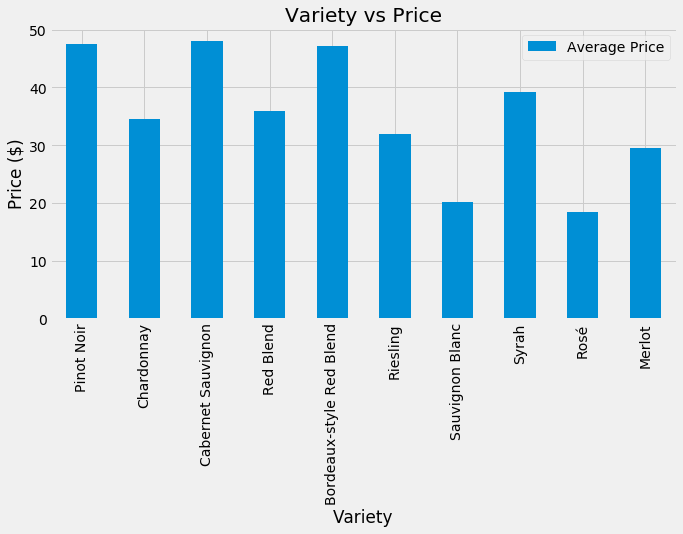

In [87]:
plt.style.use('fivethirtyeight')
final_variety_plot= final_variety_df[["Average Price"]]
final_variety_plot.plot(kind="Bar", figsize=(10,5))
plt.xlabel("Variety")
plt.ylabel("Price ($)")
plt.title("Variety vs Price")
#save it
plt.savefig("Output/Variety vs Price.png")

## Fancy Word Cloud using Wine Descriptions

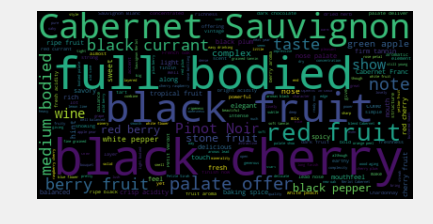

<Figure size 432x288 with 0 Axes>

In [93]:
text = " ".join(review for review in wine_df.description)
stopwords = set(STOPWORDS)
stopwords.update(["wine", "drink", "the", "and", "flavor", "flavors", "is", "will"])
wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.width=700
plt.height=500
plt.axis("off")
plt.show()
#save it
plt.savefig("Output/Word Cloud.png")